# Day 2: Algorithm Complexity, Execution Time, & Spatial Complexity – Extended Edition 🚀

## Table of Contents 📖

- [Objectives](#objectives)
- [Algorithm Complexity](#algorithm-complexity)
  - [Asymptotic Notation and Growth Rates](#asymptotic-notation-and-growth-rates)
  - [Additional Notations: Θ and Ω](#additional-notations-θ-and-ω)
  - [Real-World Examples & Quiz Questions](#real-world-examples--quiz-questions)
- [Estimating Execution Time](#estimating-execution-time)
  - [Measuring with the `time` Module](#measuring-with-the-time-module)
  - [Using the `timeit` Module](#using-the-timeit-module)
  - [Practical Benchmarking Considerations](#practical-benchmarking-considerations)
  - [Profiling: Beyond Timeit](#profiling-beyond-timeit)
- [Spatial Complexity](#spatial-complexity)
  - [Memory Usage and Trade-Offs](#memory-usage-and-trade-offs)
  - [Detailed Example: DNA Sequence Analysis](#detailed-example-dna-sequence-analysis)
  - [Comparing Data Structures](#comparing-data-structures)
- [Solving Algorithmic Problems](#solving-algorithmic-problems)
  - [A Systematic Approach to Problem Solving](#a-systematic-approach-to-problem-solving)
  - [Tips, Strategies, and Common Pitfalls](#tips-strategies-and-common-pitfalls)
- [Conclusion & Further Reading](#conclusion--further-reading)

## Objectives

- **Deepen Your Understanding of Asymptotic Analysis:** Examine how algorithm efficiency is measured as the input size increases and explore additional notations like Θ (tight bound) and Ω (lower bound). 🤓
- **Compare Different Growth Rates:** Contrast O(1), O(n), O(n²), O(2^n), and O(n³) with concrete examples. 📈
- **Measure Execution Time in Python:** Learn to use both `time` and `timeit` modules, and understand how to profile code for deeper insights. ⏱️
- **Analyze Spatial Complexity:** Understand how an algorithm's memory consumption grows with input size, and explore the trade-offs between time and space. 💾
- **Adopt a Systematic Problem-Solving Approach:** Master a step-by-step process for designing, testing, and optimizing algorithmic solutions while avoiding common pitfalls. 🔍

## Algorithm Complexity

### 1. Asymptotic Notation and Growth Rates 📈



From the previous lessons, you’ve learned that different algorithms can have different running times. You might wonder why we need to know this. After all, “everyone calculates algorithm complexity” might sound like just another topic from the realm of abstract and convoluted programming stuff. But don’t jump to conclusions! Repeat this mantra a few times to absorb its essence:

```
O(n) — linear dependence
O(log n) — logarithmic dependence
```

Look closely—the meaning becomes clear: it’s about how the algorithm’s running time changes as the input size grows, and whether it can handle that growth at all. In theory, this is called asymptotics and is written as `O(n)` (read as “big O of n”). Sometimes people say **Big O notation**.

When you design an algorithm, knowing how its running time scales is essential—especially if `n` becomes very large. 😊

### 2. Big O Notation in Practice 🤔



Such abbreviations are referred to as **O-notation** (from the English “Big O notation”).

In **O-notation**, we do not account for constants and coefficients. For instance, if an algorithm performs $5 \times n + 3$ operations, its complexity is $O(n)$. In asymptotic analysis, constant values become negligible as $n$ grows. We cannot say that constants are entirely unimportant—after all, in practical scenarios, they can affect performance for smaller inputs. However, they **do not** fundamentally alter whether the algorithm remains feasible for large $n$.

To illustrate, consider the running times of several algorithms:

1. **First algorithm:** performs $2n + 3$ operations.  
2. **Second algorithm:** performs $3n$ operations.  
3. **Third algorithm:** performs $\log(n+2)$ operations.  
4. **Fourth algorithm:** performs $\log(n+1)+1$ operations.

If you plot the number of operations against $n$, you will see that, as $n$ becomes very large, these expressions differ only by their constant factors or linear coefficients—yet they all grow **linearly** with $n$. In Big O notation, each one is described as $O(n)$.

### 3. Key Point 🧠



Although constants and lower-order terms can matter for small inputs, they **cannot** transform a linear algorithm into a quadratic or exponential one, and vice versa. That is why Big O notation focuses on the **dominant term** as $n$ tends to infinity, giving us a clear picture of how an algorithm’s complexity scales in the long run.

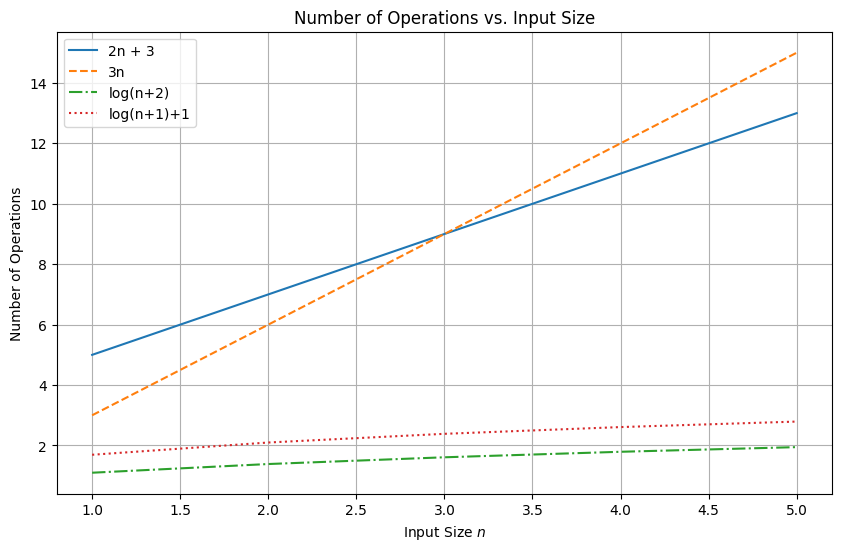

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of input sizes
n = np.linspace(1, 5, 5)

# Define several example functions
f1 = 2*n + 3           # First algorithm: 2n + 3
f2 = 3*n               # Second algorithm: 3n
f3 = np.log(n + 2)     # Third algorithm: log(n+2)
f4 = np.log(n + 1) + 1 # Fourth algorithm: log(n+1) + 1

plt.figure(figsize=(10, 6))
plt.plot(n, f1, label='2n + 3', linestyle='-')
plt.plot(n, f2, label='3n', linestyle='--')
plt.plot(n, f3, label='log(n+2)', linestyle='-.')
plt.plot(n, f4, label='log(n+1)+1', linestyle=':')
plt.xlabel('Input Size $n$')
plt.ylabel('Number of Operations')
plt.title('Number of Operations vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

The first and second algorithms are similar to each other, just as the third and fourth algorithms resemble one another. However, the first two differ significantly from the last two. This happens because, for large $n$, the **type** of dependence (i.e., linear, logarithmic, quadratic, etc.) is more important than any specific coefficients or additional terms. That is why, in Big O notation, we focus solely on the **form** of the dependence.

Aside from linear and logarithmic complexity, you will often encounter other common forms when analysing an algorithm’s running time:

- **Quadratic dependence** — $O(n^2)$  
- **Cubic dependence** — $O(n^3)$  
- **Exponential dependence** — $O(2^n)$  
- **Factorial dependence** — $O(n!)$

Sometimes, an algorithm’s running time does not depend on the size of the input data at all; in other words, it always performs a fixed number of operations. In Big O notation, we call this **$O(1)$**, or **constant time**.

### 4. Additional Notations: Θ and Ω 🤓



- **Θ (Theta) Notation:** Represents a tight bound on the algorithm's running time. If an algorithm’s runtime is Θ(f(n)), its growth rate is exactly f(n) for large n.
- **Ω (Omega) Notation:** Provides a lower bound on the runtime. If an algorithm is Ω(f(n)), it takes at least f(n) time to run.

These notations help further refine the analysis by distinguishing between best-case, average-case, and worst-case scenarios. 🤓

### 5. Real-World Examples & Quiz Questions 🧐

#### **Example 1: Cupboard Notebook Run 📚** 

In the hospital George usually visits, there is Dr James Thompson on duty. He is not especially sociable, spending all his time in his office, with the door only slightly ajar.

We need to determine how many times per day the door to Dr Thompson's office is opened, under the assumption that each patient enters, leaves, and closes the door behind them:

- Each visitor opens the door twice: once upon entering and once upon leaving.  
- If there are $n$ visitors, then naively you might think the door is opened $2n$ times.  
- However, because the door was already ajar at the start of the day, the very first opening does not require a "full" door-opening motion. Thus, the total number of **complete** openings is $2n - 1$.

Since $(2n - 1)$ grows in direct proportion to $n$, we say the number of door openings is **$O(n)$**. The important point is that subtracting a constant (in this case, 1) does not alter the fundamental growth rate of the function.

#### **Example 2: Elevator Meetings** 🏢



In a camp, there was a rumor that Tim shook hands three times with his father and even gave him a soda by hand. Later, he greeted everyone in the ward (20 times, never repeating himself) and challenged the idea of “squaring.”

Suppose there are $n$ people in total. Each person greets every other person exactly once, resulting in $(n - 1)$ handshakes per person. Since a handshake between A and B is the same as between B and A, the total number is given by:

$$\frac{n(n - 1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$

For large $n$, this behaves like $n^2$ (ignoring lower-order terms and constants), i.e. $O(n^2)$. 

Pay attention to the fact that the number of handshakes grows quadratically with the number of people. This is a common pattern in problems involving pairs of elements, such as comparing all pairs of elements in a list.

We can get rid of the fraction by multiplying the result by 2, which does not change the growth rate. This is a common trick in Big O analysis. It happens because the fraction is a constant factor, and Big O notation ignores constants.
💡

#### **Example 3: Brute Force Conversion (Decimal to Binary)** 🧮



Suppose we need to iterate through all binary strings of length $n$. For $n = 3$, the strings are: 000, 001, 010, 011, 100, 101, 110, and 111.



##### Quiz Question:



Which time complexity does this exhaustive search have?

- $O(N^2)$
- $O(2^N)$
- $O(N^3)$
- $O(\log N)$

The **correct answer** is **$O(2^N)$** because exponential complexity is only practical for very small $N$. 🔥

#### **Example 4: Simple Python Programme Complexity** 🐍



You receive a single integer $n$ as input and need to compute $42 \times n + 15$. Consider this Python programme:

```python
n = int(input())
print(42 * n + 15)
```

What is the computational complexity of this programme?

- $O(n)$
- $O(1)$
- $O(\log n)$
- $O(n^2)$

The **correct answer** is **$O(1)$** because it performs a fixed number of operations regardless of $n$.

#### **Example 5: Clothes Selection** 👗


Every day, **George** decides what to wear by running a programme on his computer. The algorithm goes through all combinations of **trousers** and **T-shirts**, shows each combination to George, and asks him to rate it on a scale of 1 to 10. After that, the programme reviews all these ratings, selects the highest-rated outfit, and tells George what to wear.

George has $n$ pairs of trousers and $m$ T-shirts. What is the complexity of the algorithm?

- $O(n)$  
- $O(m)$  
- $O(n^2)$  
- $O(m^2)$  
- **$O(nm)$**  
- $O(n + m)$

The **correct answer** is **$O(nm)$** because the algorithm must consider all possible combinations of trousers and T-shirts. 🤔

#### **Example 6: Binary Search** 🔍



**Alice** wrote an algorithm to find a particular bottle among $n$ shops. The shops are recorded in alphabetical order, and her algorithm uses **binary search**. What is the complexity of her algorithm?

- $O(n)$
- $O(n^2)$
- $O(\log n)$
- $O(1)$

Since binary search halves the search space with each step, its running time grows **logarithmically**: $O(\log n)$. 🔍

#### **Comparing Complexities** 📊



George initially thought Alice’s algorithm was $O(n^2)$. However, **Timothy** argued that since $\log n$ grows much more slowly than $n^2$, the binary search is far more efficient.

In fact, if binary search is used correctly, its complexity is $O(\log n)$, which is significantly better than $O(n^2)$. 👍

#### **Key Takeaways 🚀**



1. **Exponential Complexity ($O(2^n)$)**: Practical only for very small $n$. 🚫
2. **Constant Complexity ($O(1)$)**: The work remains unchanged regardless of $n$. 🔒
3. **Logarithmic Complexity ($O(\log n)$)**: Efficiently halves the problem size (e.g., binary search). ⚡
4. **Polynomial Complexities ($O(n), O(n^2), O(n^3)$, etc.)**: Manageable in many cases, but may become heavy as $n$ increases. 📊

## Estimating Execution Time

In previous part, we explored how an algorithm’s running time behaves as the size of the input data grows. You now know that an $O(n)$ algorithm typically runs around three times faster than an $O(n^2)$ algorithm, for large $n$. But how can you tell if it’s sufficiently efficient for your specific task—or whether it will remain efficient enough in practice?


### 1. Practical Testing 🧪

One way to assess any algorithm is to **test it repeatedly** with various values of $n$, to see at which point the programme starts taking too long to finish. This gives you a sense of where the boundary lies between acceptable performance and lengthy waiting times.

Here, the running time is $O(n)$, where $n = \text{visitor}$. However, is this algorithm viable for a **very large** number of visitors?

In essence, the code prints the list twice. If we have a huge number of visitors, the algorithm will print $2n$ times. Although that is still $O(n)$ in asymptotic terms, it could take a considerable amount of time in practice. And when $n$ becomes **enormous**, while memory or processing resources are limited, it becomes a serious concern.


### 2. Measuring Real Execution Time 🕰️

You can also measure the **actual** running time, for example, using `time.time()` or `time.perf_counter()` in Python. This gives you specific figures for how many seconds it took to run that segment of code. Such data helps you determine whether, for instance, two seconds is acceptable, but ten seconds might be too long. Let's implement this:

In [12]:
import time

start_time = time.time()

visitor = 1000
a = []

for i in range(visitor):
    a.append(i)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0005850791931152344 seconds ---


In [13]:
import time

start_time = time.perf_counter()

visitor = 1000
a = []

for i in range(visitor):
    a.append(i)

print("--- %s seconds ---" % (time.perf_counter() - start_time))

--- 0.0005474839999806136 seconds ---


#### Using the `timeit` Module 🕰️


Another way to measure execution time is with the `timeit` module. This module provides a simple interface for measuring the time taken by small code snippets. Here’s an example:


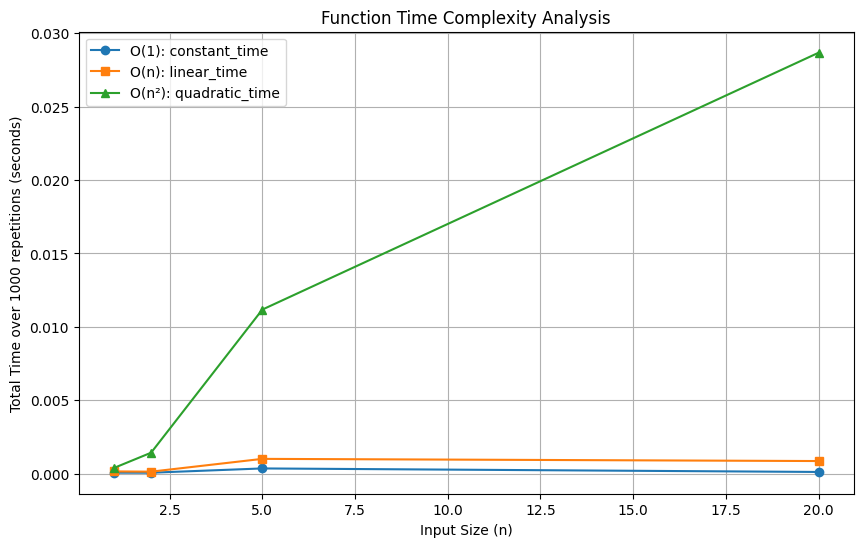

In [14]:
import timeit
import matplotlib.pyplot as plt

# Define three functions with different time complexities

# O(1) - Constant time: simply returns the first element of the list.
def constant_time(lst):
    return lst[0]

# O(n) - Linear time: sums all elements in the list.
def linear_time(lst):
    total = 0
    for x in lst:
        total += x
    return total

# O(n^2) - Quadratic time: computes a sum over all pairs of elements in the list.
def quadratic_time(lst):
    total = 0
    n = len(lst)
    for i in range(n):
        for j in range(n):
            total += lst[i] * lst[j]
    return total

# Define a range of input sizes
input_sizes = [1, 2, 5, 20]
# Number of repetitions to get a measurable time
repetitions = 1000

# Containers to store the timing results
times_constant = []
times_linear = []
times_quadratic = []

# Measure time for each function and input size
for size in input_sizes:
    # Generate a sample list of a given size
    lst = list(range(size))
    
    # Use lambda functions to "freeze" the current list as an argument for each function
    timer_constant = timeit.Timer(lambda: constant_time(lst))
    timer_linear = timeit.Timer(lambda: linear_time(lst))
    timer_quadratic = timeit.Timer(lambda: quadratic_time(lst))
    
    # Time the execution for a number of repetitions
    t_const = timer_constant.timeit(number=repetitions)
    t_linear = timer_linear.timeit(number=repetitions)
    t_quad = timer_quadratic.timeit(number=repetitions)
    
    times_constant.append(t_const)
    times_linear.append(t_linear)
    times_quadratic.append(t_quad)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_constant, label='O(1): constant_time', marker='o')
plt.plot(input_sizes, times_linear, label='O(n): linear_time', marker='s')
plt.plot(input_sizes, times_quadratic, label='O(n²): quadratic_time', marker='^')
plt.xlabel('Input Size (n)')
plt.ylabel('Total Time over {} repetitions (seconds)'.format(repetitions))
plt.title('Function Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()


### 3. Balancing Theory and Practice 🤹‍♂️


In this lesson, we will learn to balance the **theoretical** assessment using Big O notation with **practical testing** on real data. It is not a matter of one being more important than the other. We need to evaluate both aspects: some issues can be solved by optimising the algorithm itself, while others may require changing our overall approach or selecting a different method entirely.

#### Is This $O(n)$ Approach Feasible in Practice? 🤔


We have established that the algorithm’s complexity is $O(n)$, where $n$ is the number of journeys. But can we realistically apply this method?

First, we need to consider the **scale** of $n$. For example, imagine a city of ten million inhabitants, each making two journeys per day over the course of a month. That gives us $600$ million journeys in a single month. We might round this up to **one billion** to account for additional trips by tourists or other factors.

Now we need to estimate how **quickly** a modern computer can handle these operations. Suppose a current processor can perform roughly one billion operations per second. If we assume each journey corresponds to **one operation**, then one billion journeys would take about one second—if everything were executed sequentially without any other overhead. On a $2.5$ GHz processor, in theory, that could be $2.5$ billion operations per second.

We can express this as:
$$
t = \frac{n}{\text{frequency}}
$$
If $n = 1{,}000{,}000{,}000$ (one billion) and the frequency is $2.5 \times 10^9$ operations per second, the calculation suggests:
$$
t = \frac{1{,}000{,}000{,}000}{2.5 \times 10^9} = 0.4 \text{ seconds.}
$$

In principle, **0.4 seconds** might sound acceptable. However, in real scenarios, there are always additional considerations such as scheduling, resource sharing with other processes, memory constraints, and so on. As a result, the actual running time could be noticeably longer.

Whether 0.4 seconds is too slow or perfectly fine depends on the **specific requirements** of the task. In some applications, half a second is negligible, while in others, it might be considered unacceptably slow. That is why we must balance **theoretical** complexity with the **practical** realities of system performance and workload.

Here we can see that the **theoretical** complexity of an algorithm is only one part of the story. The **practical** side is equally important, as it determines whether the algorithm can be applied in real-world scenarios.

**[George]:**  Is it really possible to account for a single journey in just one processor tick?  
  
**[Timothy]:**  I’m glad you’ve pointed that out. Indeed, a single tick isn’t enough. Processor instructions are the most basic operations, but even they are more complex than they appear. For instance, you need to access memory; if the data doesn’t fit in RAM, you’ll have to fetch it from the hard drive or even from the network. And all this is just to handle one single step in the process.
  
**[George]:** So, what steps does the programme actually have to perform to handle just one journey?

**[Timothy]:**
The programme needs to:  
1. Read how many passengers are on board.  
2. Record who got on.  
3. Record who got off.  
4. Check if each passenger has paid.  
5. Keep track of the total fare.  
6. Update its data structure.  
7. Possibly carry out other checks as well.
  
**[George]:** So it seems we were off by a factor of ten in our time estimate. Instead of 0.4 seconds, it might actually take 4 seconds—or even longer.
  
**[Timothy]:** Exactly. The actual processing speed depends on many factors.

The number of instructions in a programme can vary slightly depending on the processor used or the compiler’s optimisations. Some instructions may take multiple ticks, while others—especially arithmetic operations—can be handled in fractions of a tick.

It follows that if we wanted to ignore constants in our time-complexity analysis, we couldn’t entirely do so in practice: there are too many nuances in how instructions are actually executed. However, this is precisely why we use **Big O notation**—it offers a high-level view of the algorithm’s growth rate, leaving out the smaller details.

### 4. Measuring Actual Performance 📏


To see how our rough estimates hold up in reality, we can measure how long it takes to run a simple loop in **Python**, as in the following code:

#### Python Example

In [15]:
import time

time_start = time.time()
i = 0
while i < 1000000000:  # 1 billion iterations
    # do nothing
    i += 1
time_span = time.time() - time_start
print(time_span, "seconds")

94.62271499633789 seconds


#### C++ Example

```cpp
#include <iostream>
#include <chrono>

int main() {
    auto start = std::chrono::high_resolution_clock::now();
    long long i = 0;
    while (i < 1000000000LL) {
        i++;
    }
    auto finish = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> time_span = finish - start;
    std::cout << time_span.count() << " seconds\n";
    return 0;
}
```


Each iteration of the loop involves three steps: 
- incrementing a counter,  
- checking the condition, 
- and jumping back to the start of the loop. 

Multiplying those three actions by a billion iterations gives you around three billion operations, which might theoretically take about **1.2 seconds**. 

 A C++ programme can indeed run at roughly that speed, although in reality it might be faster or slower. Timothy points out that Python may run about **150 times more slowly**, owing to additional overhead. If you understand lower-level details, you know that `i++` in Python eventually generates several instructions, plus condition checks, array-boundary checks, loop management, and so on.

Any performance estimate is rough, so it is wise to build in a **margin of safety**. Yes, a billion iterations might take around one second—or less—in C++, whereas in Python it could take minutes. In practice, performance also depends on the operating system, how many other processes are running, and the processor’s workload. Moreover, C++ and Go typically achieve tighter performance than Java, which in turn tends to be tighter than Python or Node.js.

When deciding on an approach to solve a particular problem, you need to **evaluate** how long it will take for your input size and **choose** a suitable method. That choice might range from using straightforward algorithms to devising more advanced solutions.

Ultimately, it is best to understand the **theory** and then **test** your code in practice. In the tasks ahead, you will need to determine whether your algorithm can complete within the specified constraints.

Thus, although theory provides a **rough** estimate, practical measurements are essential for determining how code will truly perform in a given language and environment.

#### **Exercise 1: Apple Selection** 🍏




George has gone to buy apples for **Ally** and **Rita**. On the shop counter, there are $N$ apples ($2 \le N \le 10{,}000$). To avoid offending anyone, he decides to purchase two apples whose weights differ by the smallest possible amount. George’s idea is to check **every pair** of apples and record the pair if it offers a smaller weight difference than the previous best choice.

**Question**: How long would this algorithm take to run in Python? Select the option that best matches the likely runtime.

- $0.01$ seconds
- $0.1$ seconds
- $1$ second
- $20$ seconds
- $1000$ seconds



This is not the most efficient algorithm, and it has **quadratic** complexity. For $N = 10^4$, the number of comparisons is:

$$
\frac{N \times (N - 1)}{2} \;=\; \frac{10^4 \times (10^4 - 1)}{2} \;\approx\; 5 \times 10^7 \text{ iterations.}
$$

Suppose each iteration involves around ten operations. If each operation takes about **100 processor ticks** in Python, then each iteration amounts to roughly $10 \times 100 = 1000$ ticks. With a processor speed of $2.5 \times 10^9$ ticks per second, this corresponds to approximately **20 seconds** of computation time in an ideal scenario.

It is important to note that this is a **rough** estimate. The actual performance could vary significantly—perhaps the algorithm might take only 2 seconds or it could take 4 seconds, 10 seconds, or even 100 seconds. We cannot rule out the possibility that it might finish in **30 seconds** under real conditions, or that it might require over **1000 seconds** if the environment is heavily loaded.

The **correct answer** is **$20$ seconds**. 

#### **Exercise 2: Solar System Model** 🌌



In the same shop, **George** decided to buy a pair of apples for his model of the Solar System. He needs to find two apples that differ in size by the **maximum** possible amount—one to represent the **Sun** and one for **Pluto**. To do this, George decided to first locate the smallest apple, then the largest. **How long will this search take?**

- $0.01$ seconds
- $0.1$ seconds
- $1$ second
- $10$ seconds


This task was **much more efficient**. The linear algorithm managed it in **less than one hundredth of a second**. The total number of loop iterations is:
$$
2 \times N = 2 \times 10^4,
$$
where the factor of 2 arises because we are finding both the **minimum** and the **maximum** values. Consequently, the approximate running time is:
$$
\frac{2 \times 10^4 \times 100}{2.5 \times 10^9} = 8 \times 10^{-3} \text{ seconds.}
$$

In other words, it took **roughly 0.008 seconds**.

The **correct answer** is **$0.01$ seconds**.

#### **Exercise 3: Apple Sponge Recipe** 🍰



George still has some leftover apples, so he decides to bake an apple sponge (sharlotka). This time, he needs to load a book containing **one billion recipes** into the computer and choose the right one. The recipes in the book are sorted in alphabetical order, so George opts to use **binary search**. How long will it take to find the recipe?

- $10$ microseconds  
- $0.01$ second 
- $0.1$ second
- $1$ second
- $100$ seconds


In this task, binary search requires only a **small, logarithmic** number of steps, each of which can be executed almost instantly—on the order of **tens of microseconds**. However, we must not forget that the programme first has to **read** this enormous book of recipes in a loop, and that stage can take a **significant** amount of time. Ultimately, the overall speed of the programme is determined by this “bottleneck,” i.e., the slowest part of the process.

The **correct answer** is **$100$ seconds**.

#### Conclusion 🎉



Occasionally, your programmes may contain sections of code that run too slowly. To detect these, it helps to learn how to measure the execution time of individual parts of your code in your preferred programming language. If a programme is running more slowly than expected, it is often useful to measure the runtime of its main components. By examining the timing results in detail, you can pinpoint what is causing the slowdown. When necessary, you can also “profile” the programme.

Once you have identified a slow portion of the programme, you can try to **optimise** it. This typically involves rewriting that section in a different way and **comparing the speeds** of the different versions using the same data—a process often referred to as “benchmarking.”

It is important to recognise, however, that **not** every line of code needs to be written with absolute maximum efficiency in mind. For example, if your programme completes its task in **10 milliseconds**, and all you are doing is iterating through an array, the difference between a linear search and a binary search may be negligible—both will finish faster than you can blink. In such cases, it makes little sense to invest time in that micro-optimisation when you could be improving **other** parts of the code that are genuinely slowing things down.

Similarly, if your programme consists of two sections—one that consumes **99%** of the total runtime and another that consumes **1%**—even speeding up the smaller section by a factor of **10** will not noticeably reduce the overall execution time. The key takeaway is to **prioritise** optimisation where it will have the greatest impact on your programme’s performance.

## Space Complexity


When discussing a programme’s efficiency, we can also assess how it utilises various computer resources. One of the most important of these resources is **memory**. In other words, we want to measure the programme’s capacity to store data structures in memory, as well as any additional overhead.


### 1. What Is the Space Complexity of an Algorithm? 🧠



We have already talked about **time complexity**, where we considered how an algorithm’s running time changes as the input grows. However, even the most efficient algorithm can be impractical if it uses an excessive amount of memory. **Space complexity** describes how much memory is required as the input size increases.

It is helpful to distinguish between:
- **Input storage**: For instance, if your algorithm must read a file from disk, that file size is typically considered *given* and not always counted as additional memory usage.  
- **Additional memory usage**: Data structures (arrays, lists, trees, etc.) that the algorithm creates and uses during execution.

If an algorithm’s computational complexity is too high, the user may have to wait a very long time for the programme to finish.Another crucial factor is the amount of random-access memory (RAM). Programmes that do not have enough memory may freeze, disrupt other processes, and in many cases be unable to complete their tasks at all.

<div style="width: 90%; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: 'Courier New', Courier, monospace;">
  <p style="font-size: 16px; line-height: 1.6;">
    When a program exhausts the available <strong>RAM</strong>, it turns to a <strong>swap file</strong> or <strong>swap partition</strong>—a process derived from “to swap”. 
    This swap area, residing on an external storage device (like a hard disk or SSD), serves as an extension to the system’s memory.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    If insufficient RAM is available, data is shuttled from the relatively small but <strong>fast</strong> memory to the <strong>large</strong> but <strong>slow</strong> disk. 
    When necessary, the data is retrieved back into RAM—a process that is inherently <strong>slow</strong> and often leads to noticeable lags or hangs.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    In cases where the program is extraordinarily large or when many processes run concurrently, even swapping may fall short. 
    If no new data can be accommodated in either <strong>RAM</strong> or the swap area, the program—or even the entire system—may crash.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    In essence, when both <strong>RAM</strong> and swap space are fully utilized, at least one running program is bound to fail.
  </p>
</div>


Each object in a programme occupies some amount of memory, and storing a large number of objects can require significant space. It is important to pay attention to how you allocate arrays, strings, or other containers, because their sizes are often determined by the size of the input data.

**Space complexity** describes how the amount of memory an algorithm needs grows in relation to the size of its input. Just as with **time complexity**, we use **Big O notation** to indicate this growth. When smaller details (constants, lower-order terms) are ignored, we focus on the main term that dominates for large inputs.

For instance, if your programme uses a **fixed** number of variables, we say it has **$O(1)$ space complexity**—that is, constant space usage. However, if the programme reads $n$ items of data and stores them in memory linearly (for example, in an array), it requires **$O(n)$** space.

If the algorithm generates a two-dimensional structure for its $n$ objects—say, a matrix of size $n \times n$—then it will occupy **$O(n^2)$** space, i.e., **quadratic** memory usage.

## Relationship Between Space and Time Complexity 🔄


Every living organism on Earth (from bacteria to humans) is encoded by a set of DNA molecules. Each molecule is a chain made up of four nucleobases—called **adenine (A)**, **thymine (T)**, **guanine (G)**, and **cytosine (C)**:

- **A** (adenine)  
- **T** (thymine)  
- **G** (guanine)  
- **C** (cytosine)

DNA forms a double helix composed of two complementary chains. In this structure, **A** always pairs with **T**, while **G** pairs with **C**. Thanks to this predictable pairing, the double helix can be “unzipped” to read the code and then zipped up again.

Suppose **Alla** and **Rita** have discovered a sample of DNA, represented as a string of letters—something like **“A T G G T A C T G C T T T C G T A C”**—and they wish to analyse it. For example, they might want to identify how many times the sequence **“AGTA”** appears in the DNA, or find which **n**-letter substring occurs most frequently.


### Space and Time Complexity in Practice 🚀



When analysing this DNA sequence, one must consider both **time complexity** (how many operations are needed to process the data) and **space complexity** (how much memory is needed to store and manipulate it). For instance:

- If an algorithm scans each position in the DNA to check for a certain substring, it might require **\(O(n)\)** time for each scan, leading to a total of **\(O(n^2)\)** time if it naïvely checks every possible starting position.  
- Storing the DNA sequence in memory typically requires **\(O(n)\)** space, where \(n\) is the length of the sequence. If the algorithm needs additional data structures—say, suffix arrays or hash tables—this space requirement can grow accordingly.

Thus, **Alla** and **Rita** will need an algorithm that efficiently handles both the **time** and **space** aspects of processing these letters. They must consider how the algorithm’s running time scales with the input size, as well as how much memory it requires.

Initially, **Rita** decided on the following method: she introduced a counter and iterated through all the letters in the sequence, increasing the counter whenever she encountered **C** or **G**. In Python, this might look like:

```python
cg_count = 0
sequence = "..."  # some DNA sequence

for position in range(left, right):
    if (sequence[position] == "C") or (sequence[position] == "G"):
        cg_count += 1

print(ccg_count)
```

To count the necessary letters, she spent **\(O(n)\)** time, where \(n\) is the length of the sequence. In terms of **space complexity**, she only needed one counter and a few temporary variables, so the additional memory usage is **\(O(1)\)**.

Why additional memory usage? Because the counter and temporary variables occupy a fixed amount of memory, regardless of the sequence’s length. This is why we say the space complexity is **\(O(1)\)**. The amount of memory required by the algorithm does not grow with the input size, it depends only on the algorithm’s structure itself, it is called **additional memory usage**.

However, suppose Rita also wants to **frequently** determine how many **C** or **G** letters appear in various segments of the sequence. Re-running the above loop for each query would repeatedly take \(O(n)\) time, which might become costly if she does this many times.  

One way to speed up these repeated queries is to use **prefix sums** (also known as **cumulative sums**). By storing partial counts for each position in an array (requiring **\(O(n)\)** space), Rita can then answer each query in **\(O(1)\)** time. This trade-off illustrates how **time** and **space** complexities often interact: using **more memory** can significantly reduce the running time for certain tasks.

After a while, **Rita** got tired of counting the same letters over and over and came up with a new approach.

Instead of counting them directly each time, she stored, at each position, the number of times a given letter (C or G) had appeared **up to** that position. This is known as a **prefix sum** or **cumulative sum**.

For example, consider the sequence:

```
C C A T G A T C
0 1 2 2 3 3 3 4
```

To calculate the number of CG-letters in some half-interval, it is enough to subtract from the cumulative sum at the right end (more precisely, at the `right` position) the same sum at the left end. This requires only **\(O(1)\)** time per query, as opposed to **\(O(n)\)** if we were to recompute the count each time.

```python
cumulative_sums = [0]
cg_count = 0

for pos in range(len(sequence)):
    if (sequence[pos] == "C") or (sequence[pos] == "G"):
        cg_count += 1
    cumulative_sums.append(cg_count)

print(cumulative_sums[right] - cumulative_sums[left])       
```

Now, Rita can quickly answer questions such as: “How many C/G letters are there between positions **L** and **R**?” She simply computes:

$$
\text{count} = \text{cumulative\_sums}[R] - \text{cumulative\_sums}[L].
$$

This requires **$O(1)$** time per query, whereas computing it on the fly each time would have taken **$O(n)$**. The trade-off is that storing these prefix sums uses **$O(n)$** additional memory. 

In the end, **Rita** spent more time initially (to build the prefix sums) but greatly reduced the time needed to answer repeated queries about how many letters C or G appear in specific segments of the sequence.

The situation considered in the example is typical: we saved auxiliary information to spend less time, that is, we "exchanged" memory for speed. When solving problems, you sometimes have to make a difficult choice: either save more data to reduce the amount of computation; or compute slower, but save memory.

It should be remembered that too much memory consumption can lead to the program crashing with an error. Or its performance will deteriorate due to the use of the swap file.

<div style="width: 50%; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: 'Courier New', Courier, monospace;">
  <p style="font-size: 16px; line-height: 1.6;">
    In many cases, you do not even need to modify the algorithm itself; you simply need to save the results of <strong>intermediate computations</strong>. 
    This technique is called <strong>caching</strong> (or <strong>memoisation</strong>). In particular, it makes sense to cache any results 
    that take a long time to compute and are used frequently.
  </p>
</div>


### Reflection Questions

- How do different asymptotic notations (O, Θ, Ω) influence your choice of algorithm? 🤔
- How do hardware limitations and built-in optimizations affect the real-world performance of an algorithm? 💡
- What trade-offs between time and memory are acceptable in various projects? 🔄

### Additional Resources

- [Introduction to Algorithms (CLRS)](https://mitpress.mit.edu/books/introduction-to-algorithms) 📘
- [MIT OpenCourseWare - Introduction to Algorithms](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/) 🎓
- [GeeksforGeeks - Analysis of Algorithms](https://www.geeksforgeeks.org/analysis-of-algorithms-set-1-asymptotic-analysis/) 💻
- [Python `timeit` Documentation](https://docs.python.org/3/library/timeit.html) 📄
- [Understanding Spatial Complexity](https://www.geeksforgeeks.org/spatial-complexity-of-algorithms/) 🌟
- [cProfile and Profiling Techniques](https://docs.python.org/3/library/profile.html) 🔍